In [1]:
%matplotlib inline

import networkx as nx
from scipy.linalg import eigvals
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.sparse import csr_matrix 
from scipy.sparse.linalg import eigs
import warnings
warnings.filterwarnings('ignore')

In [2]:
def create_graph_from_file(file):
    graph_file = open("static.network")
    edges = graph_file.read().splitlines()
    vertices = []
    edge_list = []

    del edges[0]
    for edge in edges:
        vert = edge.split(" ")
        for x in vert:
            if x not in vertices:
                vertices.append(x)
        edge_list.append(tuple(edge.split(" ")))

    G = nx.Graph()
    G.add_nodes_from(vertices)
    G.add_edges_from(edge_list)

    A = nx.adjacency_matrix(G)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    return max(eg_val)

def get_strength(lambda1, beta, delta):
    return lambda1*(beta/delta)

def min_val_beta_to_epidemic(lambda1, delta):
    return (delta/lambda1)

def max_val_delta_to_epidemic(lambda1, beta):
    return (beta*lambda1)

def test_beta(lambda1, delta):
    beta_vals = np.arange(0,1,0.1)
    strengths = []
    
    for beta in beta_vals:
        strengths.append(lambda1*(beta/delta))
        
    return beta_vals, strengths

def test_delta(lambda1, beta):
    delta_vals = np.arange(0,1,0.1)
    strengths = []
    
    for delta in delta_vals:
        strengths.append(lambda1*(beta/delta))
        
    return delta_vals, strengths



Performing tests for beta = 0.2 and delta = 0.7

Results for (1a)
Strength of virus: (12.5299130745+0j)

Results for (1b)


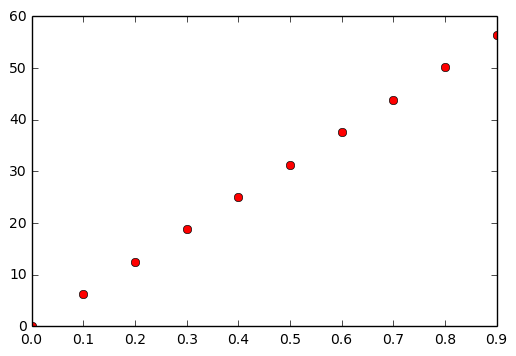


Minimum value of beta for epidemic: (0.0159618026726+0j)


Results for (1c)


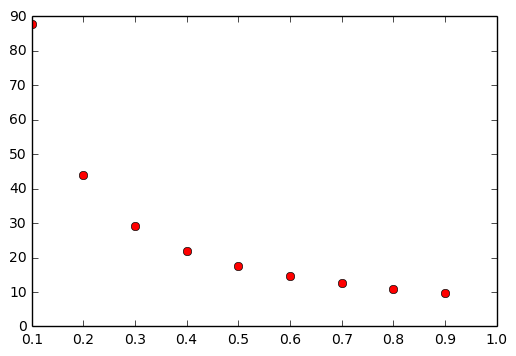


Maximum value of delta for epidemic: (8.77093915215+0j)


Performing tests for beta = 0.01 and delta = 0.6

Results for (1a)
Strength of virus: (0.730911596012+0j)


Results for (1b)


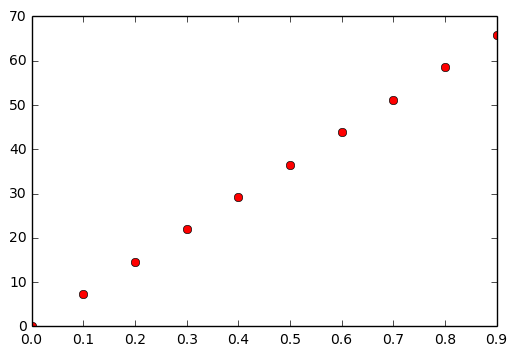


Minimum value of beta for epidemic: (0.0136815451479+0j)


Results for (1c)


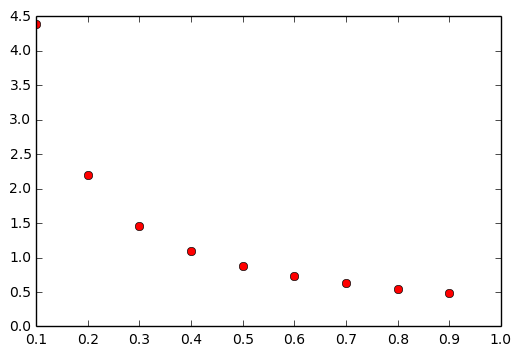


Maximum value of delta for epiemic: (0.438546957607+0j)


In [3]:
max_eig_value = create_graph_from_file("static.network")

print("Performing tests for beta = 0.2 and delta = 0.7")
print("\nResults for (1a)")
s = get_strength(max_eig_value, 0.2, 0.7)
print("Strength of virus: " + str(s))

print("\nResults for (1b)")
x,y = test_beta(max_eig_value, 0.7)
plt.plot(x, y, 'ro')
plt.show()

print("\nMinimum value of beta for epidemic: "+ str(min_val_beta_to_epidemic(max_eig_value,0.7)))

print("\n\nResults for (1c)")
x,y = test_delta(max_eig_value, 0.2)
plt.plot(x, y, 'ro')
plt.show()


print("\nMaximum value of delta for epidemic: "+ str(max_val_delta_to_epidemic(max_eig_value,0.2)))

print("\n\nPerforming tests for beta = 0.01 and delta = 0.6")
print("\nResults for (1a)")
s = get_strength(max_eig_value, 0.01, 0.6)
print("Strength of virus: " + str(s))

print("\n\nResults for (1b)")
x,y = test_beta(max_eig_value, 0.6)
plt.plot(x, y, 'ro')
plt.show()

print("\nMinimum value of beta for epidemic: "+ str(min_val_beta_to_epidemic(max_eig_value,0.6)))

print("\n\nResults for (1c)")
x,y = test_delta(max_eig_value, 0.01)
plt.plot(x, y, 'ro')
plt.show()

print("\nMaximum value of delta for epiemic: "+ str(max_val_delta_to_epidemic(max_eig_value,0.01)))

## Solution to Question 1

1a. The strength of the virus is 12.52 which is much higher than the stability threshold and hence the virus will spread across the network causing an epidemic.

1b. Keeping delta fixed, if we change the values for beta, we see that for lower values of beta the strength of the virus is less and it goes on increasing with the increase in values of beta. This is expected as the strength of the virus is directly proportional to value of beta.

    For beta = beta1 and delta = delta1, the minimum value of beta for epidemic is 0.0159618026726
    For beta = beta2 and delta = delta2, the minimum value of beta for epidemic is 0.0136815451479

1c. Keeping beta fixed, if we change the value of delta, we see that for lower delta values, the strength of the virus is high and for higher delta values the strength of the virus is low.

    For beta = beta1 and delta = delta1, the maximum value of delta for epidemic is 8.77093915215
    For beta = beta2 and delta = delta2, the maximum value of delta for epidemic is 0.438546957607

Q2. Simulation of Static Network

In [4]:
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random

def createGraph(filename):
    graphFile = open(filename)
    edges = graphFile.read().splitlines()
    vertices = range(int(edges[0].split(' ')[0]))
    edges = map( lambda x: (int(x.split(' ')[0]),int(x.split(' ')[1])) , edges[1:] )
    g = nx.Graph()
    g.add_nodes_from(vertices)
    g.add_edges_from(edges)
    return g

def getSimulationResults(graph,transmit,heal,noOfSim):
    results = list()
    #infectedNodes = set(random.sample(xrange(graph.number_of_nodes()),graph.number_of_nodes()/10))
    infectedNodes = set( random.sample(graph.nodes(),int(graph.number_of_nodes()/10)) )
    for simno in xrange(noOfSim):
        healedNodes = set()
        tempInfected = set()
        for infectedNode in infectedNodes:
            for neighborNode in graph.neighbors(infectedNode):
                infectProb = random.random()
                if infectProb<transmit and neighborNode not in healedNodes and neighborNode not in infectedNodes:
                    tempInfected.add(neighborNode)
            healProb = random.random()
            if healProb<heal:
                healedNodes.add(infectedNode)
        infectedNodes = infectedNodes.union(tempInfected)
        infectedNodes = infectedNodes - healedNodes
        results.append( float(len(infectedNodes))/graph.number_of_nodes() )
    return results

def saveFigure(values,transmit,heal):
    fig , ax = plt.subplots(nrows=1,ncols=1)
    ax.plot(range(1,len(values)+1),values)
    fig.savefig('results_plot_transmit('+str(transmit)+')_heal('+str(heal)+').jpg')
    plt.close(fig)


Results for transmit prob: 0.2  heal prob: 0.7


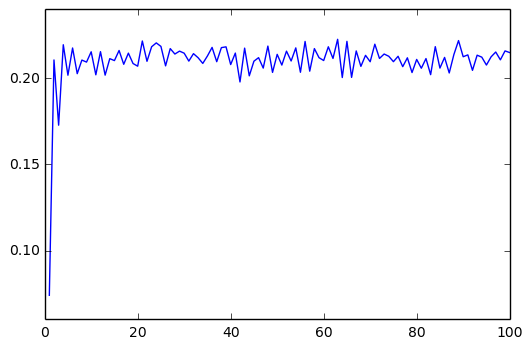

In [5]:
filename = 'static.network'
transmit = 0.2
heal = 0.7
noOfSim = 100

print 'Results for transmit prob:',transmit,' heal prob:',heal

graph = createGraph(filename)
finalResults = [ 0. for i in xrange(noOfSim) ]
for i in xrange(10):
    results = getSimulationResults(graph,transmit,heal,noOfSim)
    finalResults = [ finalResults[index] + results[index] for index in xrange(noOfSim)  ]
finalResults = map(lambda x: x/10,finalResults)
plt.plot(range(1,len(finalResults)+1),finalResults)
plt.show()

Results for transmit prob: 0.01  heal prob: 0.6


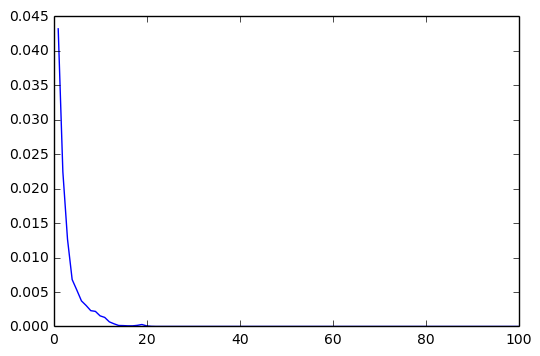

In [6]:
filename = 'static.network'
transmit = 0.01
heal = 0.6
noOfSim = 100

print 'Results for transmit prob:',transmit,' heal prob:',heal

graph = createGraph(filename)
finalResults = [ 0. for i in xrange(noOfSim) ]
for i in xrange(10):
    results = getSimulationResults(graph,transmit,heal,noOfSim)
    finalResults = [ finalResults[index] + results[index] for index in xrange(noOfSim)  ]
finalResults = map(lambda x: x/10,finalResults)
plt.plot(range(1,len(finalResults)+1),finalResults)
plt.show()

Q3. Immunization Policies


Policy A: Select k  random nodes for immunization.

Strength of virus for immunized network is: 12.37


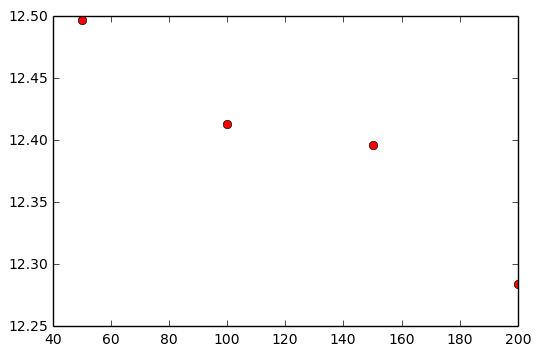


Minimum number of vaccines needed to prevent epidemic is :5250


In [29]:
def immunize_k_random(graph, k):
    nodes = nx.number_of_nodes(graph)
    rand_nodes = random.sample(range(0, nodes), k)
    new_graph = graph.copy()
    new_graph.remove_nodes_from(rand_nodes)
    
    return new_graph

def immunize_k_highest_degree(graph, k):
    degrees = graph.degree()
    sorted_degrees = sorted(degrees, key=degrees.get)
    highest_degrees = sorted_degrees[-k:]
    new_graph = graph.copy()
    new_graph.remove_nodes_from(highest_degrees)
    
    return new_graph

def immunize_k(graph, k):
    degrees = graph.degree()
    sorted_degrees = sorted(degrees, key=degrees.get)
    highest_degrees = sorted_degrees[-k:]
    new_graph = graph.copy()
    
    for vertex in reversed(highest_degrees):
        new_graph.remove_node(vertex)
        degrees = new_graph.degree()
        sorted_degrees = sorted(degrees, key=degrees.get)
        highest_degrees = sorted_degrees[-k:]
    
    return new_graph

def immunize_k_eigenvalues(graph, k):
    
    A= nx.adjacency_matrix(graph)
    A2 = csr_matrix(A,dtype=np.float)
    w,v = eigs(A2)
    
    lrgst_ev_index = np.argmax(w)
    largest_vector = v[:,lrgst_ev_index]
    nodes = np.argsort(largest_vector)
    nodes = nodes[-k:]
    
    new_graph = graph.copy()
    new_graph.remove_nodes_from(nodes)
    
    return new_graph

def get_strength(lambda1, beta, delta):
    return lambda1*(beta/delta)


k_values = np.arange(50,250,50)
beta = 0.2
delta = 0.7

print("\nPolicy A: Select k  random nodes for immunization.")
immunized_graph_policyA = immunize_k_random(graph, 200)
A= nx.adjacency_matrix(immunized_graph_policyA)
A2 = csr_matrix(A,dtype=np.float)
eg_val = eigs(A2)[0]
lambda1 = max(eg_val)

print("\nStrength of virus for immunized network is: "+str(round(get_strength(lambda1,0.2,0.7),2)))

strengths = []
for k in k_values:
    immunized_graph_policyA = immunize_k_random(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyA)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strengths.append(lambda1*(beta/delta))

plt.plot(k_values, strengths, 'ro')
plt.show()

k_values = np.arange(50,5715,50)
beta = 0.2
delta = 0.7
kmin = 0

for k in k_values:
    immunized_graph_policyA = immunize_k_random(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyA)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strength = lambda1*(beta/delta)
    if(strength < 1):
        print("\nMinimum number of vaccines needed to prevent epidemic is :" + str(k))
        k_min = k
        break
    



    3b. This policy does not have a very strong basis and may or may not work well as its nature is very random. If the random function chooses good nodes, then the immunization may work.
    
    3c. To select a random node from the sample assuming it would be O(1) complexity, the complexity would be O(k) as k random values would be needed.

    3d. For one run, this policy gave the strength of virus in immunized network as 12.27 which is not much less that the original network, hence it did not prevent an epidemic.

    3e. The above graph shows the change in values of virus strength with change with values of k.

    The minimum number of vaccines required to prevent epidemic is 5200.


Policy B: Select the k  nodes with highest degree for immunization.

Strength of virus for immunized network is: 1.08


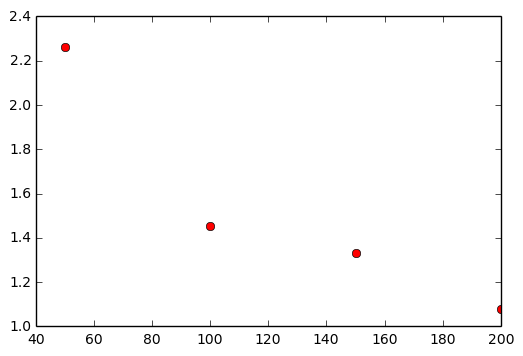


Minimum number of vaacines needed to prevent epidemic is :250


In [30]:
k_values = np.arange(50,250,50)
beta = 0.2
delta = 0.7

print("\nPolicy B: Select the k  nodes with highest degree for immunization.")
immunized_graph_policyB = immunize_k_highest_degree(graph, 200)
A= nx.adjacency_matrix(immunized_graph_policyB)
A2 = csr_matrix(A,dtype=np.float)
eg_val = eigs(A2)[0]
lambda1 = max(eg_val)

print("\nStrength of virus for immunized network is: "+str(round(get_strength(lambda1,0.2,0.7),2)))

strengths = []
for k in k_values:
    immunized_graph_policyB = immunize_k_highest_degree(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyB)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strengths.append(lambda1*(beta/delta))
    

plt.plot(k_values, strengths, 'ro')
plt.show()

k_values = np.arange(50,5715,50)
beta = 0.2
delta = 0.7
kmin = 0

for k in k_values:
    immunized_graph_policyB = immunize_k_highest_degree(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyB)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strength = lambda1*(beta/delta)
    if(strength < 1):
        print("\nMinimum number of vaacines needed to prevent epidemic is :" + str(k))
        k_min = k
        break


    3b. This policy is based on the fact that if we get rid of the nodes with the greatest number of neighbors i.e the nodes with the highest degrees, then we would help reduce the probability of virus spread by a considerable amount.
    
    3c. The complexity would be finding degree of n nodes and then sorting them thus would be 2*|E| + nlogn ~= O(n^2)

    3d. The strength of the virus after imunization with this policy is 1.08 which helped us in preventing epidemic.
     
     3e. The minimum number of vacines to prevent epidemic are 250.


Policy   C:   Select   the   node   with   the   highest   degree   for   immunization.   Remove   this   node   (and   its  incident edges) from the contact network. Repeat until all vaccines are administered. 

Strength of virus for immunized network is: 1.08


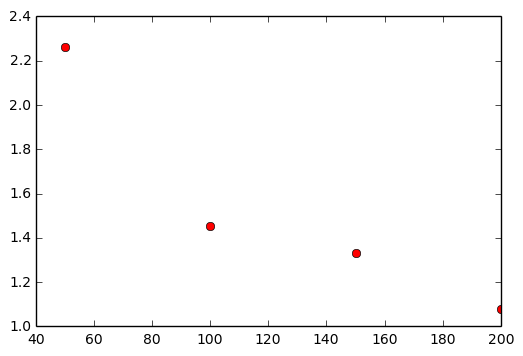


Minimum number of vaacines needed to preventepidemic is :250


In [31]:
k_values = np.arange(50,250,50)
beta = 0.2
delta = 0.7

print("\nPolicy   C:   Select   the   node   with   the   highest   degree   for   immunization.   Remove   this   node   (and   its  incident edges) from the contact network. Repeat until all vaccines are administered. ")
immunized_graph_policyC = immunize_k(graph, 200)
A= nx.adjacency_matrix(immunized_graph_policyC)
A2 = csr_matrix(A,dtype=np.float)
eg_val = eigs(A2)[0]
lambda1 = max(eg_val)

print("\nStrength of virus for immunized network is: "+str(round(get_strength(lambda1,0.2,0.7),2)))

strengths = []
for k in k_values:
    immunized_graph_policyC = immunize_k(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyC)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strengths.append(lambda1*(beta/delta))
    

plt.plot(k_values, strengths, 'ro')
plt.show()

k_values = np.arange(50,5715,50)
beta = 0.2
delta = 0.7
kmin = 0

for k in k_values:
    immunized_graph_policyC = immunize_k(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyC)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strength = lambda1*(beta/delta)
    if(strength < 1):
        print("\nMinimum number of vaacines needed to preventepidemic is :" + str(k))
        k_min = k
        break




    3b. This policy same as policy B is based on the fact that if we get rid of the nodes with the greatest number of neighbors i.e the nodes with the highest degrees, then we would help reduce the probability of virus spread by a considerable amount.
    
    3c. Complexity of this would be k times finding highest degree = O(k*|E|)

    3d. The strength of the virus after imunization with this policy is 1.08 which helped us in preventing epidemic.
    
     3e. The minimum number of vaccines to prevent epidemic are 250.

Policy   D:   Find   the   eigenvector   corresponding   to   the   largest   eigenvalue   of   the   contact   network’s  adjacency   matrix.   Find   the   ​ k   largest   (absolute)   values   in   the   eigenvector.   Select   the   ​ k   nodes   at   the  corresponding positions in the eigenvector. 

Strength of virus for immunized network is: 3.07


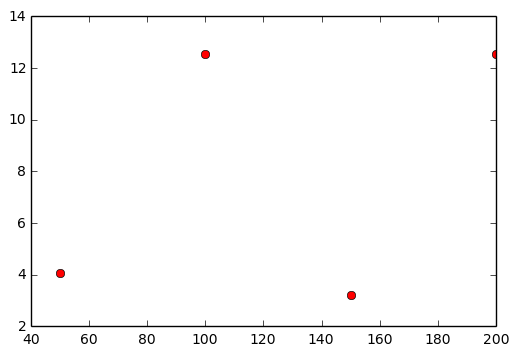


Minimum number of vaacines needed to prevent epidemic is :5550


In [32]:
k_values = np.arange(50,250,50)
beta = 0.2
delta = 0.7

print("Policy   D:   Find   the   eigenvector   corresponding   to   the   largest   eigenvalue   of   the   contact   network’s  adjacency   matrix.   Find   the   ​ k   largest   (absolute)   values   in   the   eigenvector.   Select   the   ​ k   nodes   at   the  corresponding positions in the eigenvector. ")
immunized_graph_policyD = immunize_k_eigenvalues(graph, 200)
A= nx.adjacency_matrix(immunized_graph_policyD)
A2 = csr_matrix(A,dtype=np.float)
eg_val = eigs(A2)[0]
lambda1 = max(eg_val)


print("\nStrength of virus for immunized network is: "+str(round(lambda1*(beta/delta),2)))

strn = []
for k in k_values:
    immunized_graph_policyD = immunize_k_eigenvalues(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyD)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strn.append(lambda1*(beta/delta))
    

plt.plot(k_values, strn, 'ro')
plt.show()


k_values = np.arange(50,5715,50)
beta = 0.2
delta = 0.7
kmin = 0

for k in k_values:
    immunized_graph_policyD = immunize_k_eigenvalues(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyD)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strength = lambda1*(beta/delta)
    if(strength < 1):
        print("\nMinimum number of vaacines needed to prevent epidemic is :" + str(k))
        k_min = k
        break

    3b. This policy is based on the fact that the largest eigen vector corresponds to points in the plane that reflect integral points of the graph, thus taking the k largest values of the vectors would reflect on the points in the vector that have maximum significance
    
    3c. Complexity of this would be time taken to calculate the eigen values which would be O(n^3) considering that with linear matrix algebra the multiplication of matrices won't be necessary. The sorting won't be considered as nlogn is much lesser than n^3.

    3d. The strength of the virus after imunization with this policy is 3.07 which helped us in preventing epidemic.
    
     3e. The minimum number of vaccines to prevent epidemic are 5500

3 f. Simulation of immunization policies
The simulations below reflect answers found above. For policy A and D as the strength value is greater than 1, the virus keeps spreading, but at different rates as D does significantly reduce the strength.

In case of B and C, the value drops to 1, reducing the base strength to 1 and thus the virus eventually dies out


Simulation of Policy A:
Results for transmit prob: 0.2  heal prob: 0.7


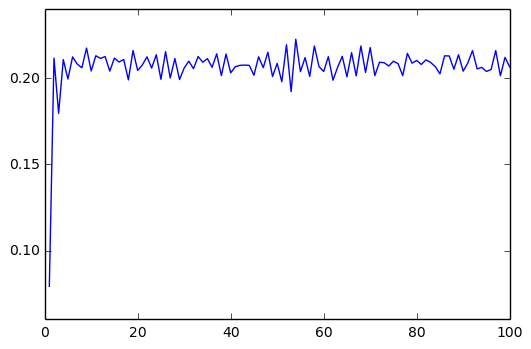

In [34]:
transmit = 0.2
heal = 0.7
noOfSim = 100

print 'Simulation of Policy A:'
print 'Results for transmit prob:',transmit,' heal prob:',heal

tempGraph = immunize_k_random(graph, 200)
finalResults = [ 0. for i in xrange(noOfSim) ]
for i in xrange(10):
    results = getSimulationResults(tempGraph,transmit,heal,noOfSim)
    finalResults = [ finalResults[index] + results[index] for index in xrange(noOfSim)  ]
finalResults = map(lambda x: x/10,finalResults)
plt.plot(range(1,len(finalResults)+1),finalResults)
plt.show()

Simulation of Policy B:
Results for transmit prob: 0.2  heal prob: 0.7


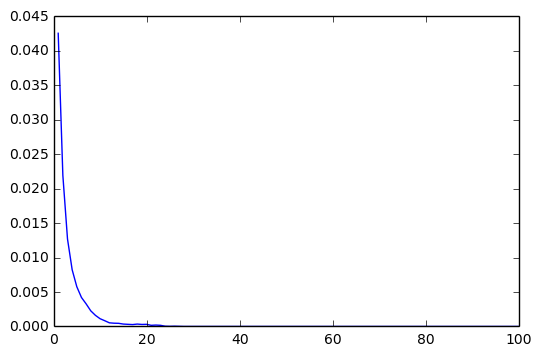

In [35]:
print 'Simulation of Policy B:'
print 'Results for transmit prob:',transmit,' heal prob:',heal

tempGraph = immunize_k_highest_degree(graph,200)
finalResults = [ 0. for i in xrange(noOfSim) ]
for i in xrange(10):
    results = getSimulationResults(tempGraph,transmit,heal,noOfSim)
    finalResults = [ finalResults[index] + results[index] for index in xrange(noOfSim)  ]
finalResults = map(lambda x: x/10,finalResults)
plt.plot(range(1,len(finalResults)+1),finalResults)
plt.show()

Simulation of Policy C:
Results for transmit prob: 0.2  heal prob: 0.7


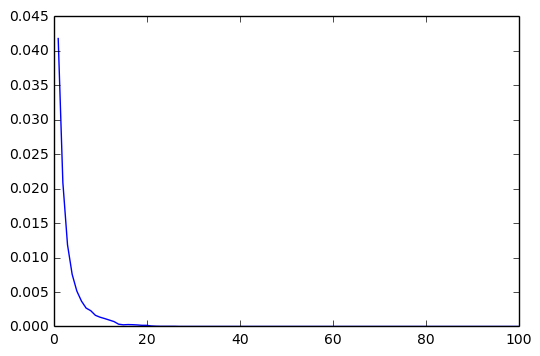

In [36]:
print 'Simulation of Policy C:'
print 'Results for transmit prob:',transmit,' heal prob:',heal

tempGraph = immunize_k(graph, 200)
finalResults = [ 0. for i in xrange(noOfSim) ]
for i in xrange(10):
    results = getSimulationResults(tempGraph,transmit,heal,noOfSim)
    finalResults = [ finalResults[index] + results[index] for index in xrange(noOfSim)  ]
finalResults = map(lambda x: x/10,finalResults)
plt.plot(range(1,len(finalResults)+1),finalResults)
plt.show()

Simulation of Policy D:
Results for transmit prob: 0.2  heal prob: 0.7


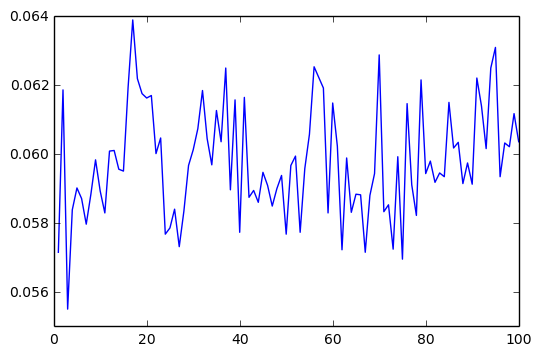

In [37]:
print 'Simulation of Policy D:'
print 'Results for transmit prob:',transmit,' heal prob:',heal

tempGraph = immunize_k_eigenvalues(graph, 200)
finalResults = [ 0. for i in xrange(noOfSim) ]
for i in xrange(10):
    results = getSimulationResults(tempGraph,transmit,heal,noOfSim)
    finalResults = [ finalResults[index] + results[index] for index in xrange(noOfSim)  ]
finalResults = map(lambda x: x/10,finalResults)
plt.plot(range(1,len(finalResults)+1),finalResults)
plt.show()